# CROP RECOMMENDER
##### Reference : https://www.kaggle.com/patelris/crop-prediction-analysis-w-classification

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ronakdudhani/CropRecommender/blob/master/CropRecommendation.ipynb)

In [1]:
from __future__ import print_function
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt, pi, log
from scipy.stats import norm
import statistics
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
from six import StringIO
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
cropdata = pd.read_csv("Crop_recommendation.csv")
cropdata.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# ANALYSING DATA

In [3]:
cropdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
cropdata.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
print("Number of crops : ",len(cropdata['label'].unique()))
print("List of crops   : ",cropdata['label'].unique())

Number of crops :  22
List of crops   :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [6]:
cropdata.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
cropdata['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [189]:
crop_summary = pd.pivot_table(cropdata,index=['label'],aggfunc='mean')
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [188]:
crop_summarystd = pd.pivot_table(cropdata,index=['label'],aggfunc='std')
crop_summarystd

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,3.320871,11.863704,8.139665,1.458551,0.268932,7.102985,0.827404
banana,3.382591,11.107241,7.690339,2.805481,0.270650,9.398150,1.428359
blackgram,3.188109,12.664258,7.151259,2.798326,0.372533,4.184186,2.686357
chickpea,3.261901,12.150649,7.498545,1.711979,0.801127,7.944350,1.169838
coconut,2.998636,11.761931,8.357244,2.686329,0.287632,29.472333,1.385734
coffee,3.246817,12.345203,7.276113,5.838566,0.417132,25.695086,1.502635
cotton,3.169680,11.628817,7.348634,3.050955,0.627170,11.231812,1.135681
grapes,3.265662,12.466829,7.619029,1.177111,0.298265,2.951759,9.738649
jute,3.313563,10.968274,7.195706,5.507798,0.446349,15.078367,1.185138


In [194]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['N'],
    name='Nitrogen',
    marker_color='mediumvioletred'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['P'],
    name='Phosphorous',
    marker_color='springgreen'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['K'],
    name='Potash',
    marker_color='dodgerblue'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['ph'],
    name='pH',
    marker_color='Red'
))


fig.update_layout(title="N-P-K and pH values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

In [191]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['humidity'],
    name='Humidity',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['rainfall'],
    name='Rainfall',
    marker_color='blue'
))
fig.add_trace(go.Bar(
    x=crop_summary.index,
    y=crop_summary['temperature'],
    name='Temperature',
    marker_color='orange'
))

fig.update_layout(title="Humidty, Temperature, Rainfall values comparision between crops",
                  plot_bgcolor='white',
                  barmode='group',
                  xaxis_tickangle=-45)

fig.show()

# SPLITING DATA TO TRAIN AND TEST

In [12]:
features = cropdata[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = cropdata['label']
acc = []
model = []
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,
                                                    random_state =2)

# USING DECISION TREE CLASSIFICATION ALGORITHM

In [149]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="gini",random_state=3,max_depth=13)

DT.fit(x_train,y_train)

predicted_values = DT.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("Decision Tree's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Decision Tree's Accuracy is:  98.4090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      0.94      0.94        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.95      0.91      0.93        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.90      0.95      0.92        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

### Visualising decision tree

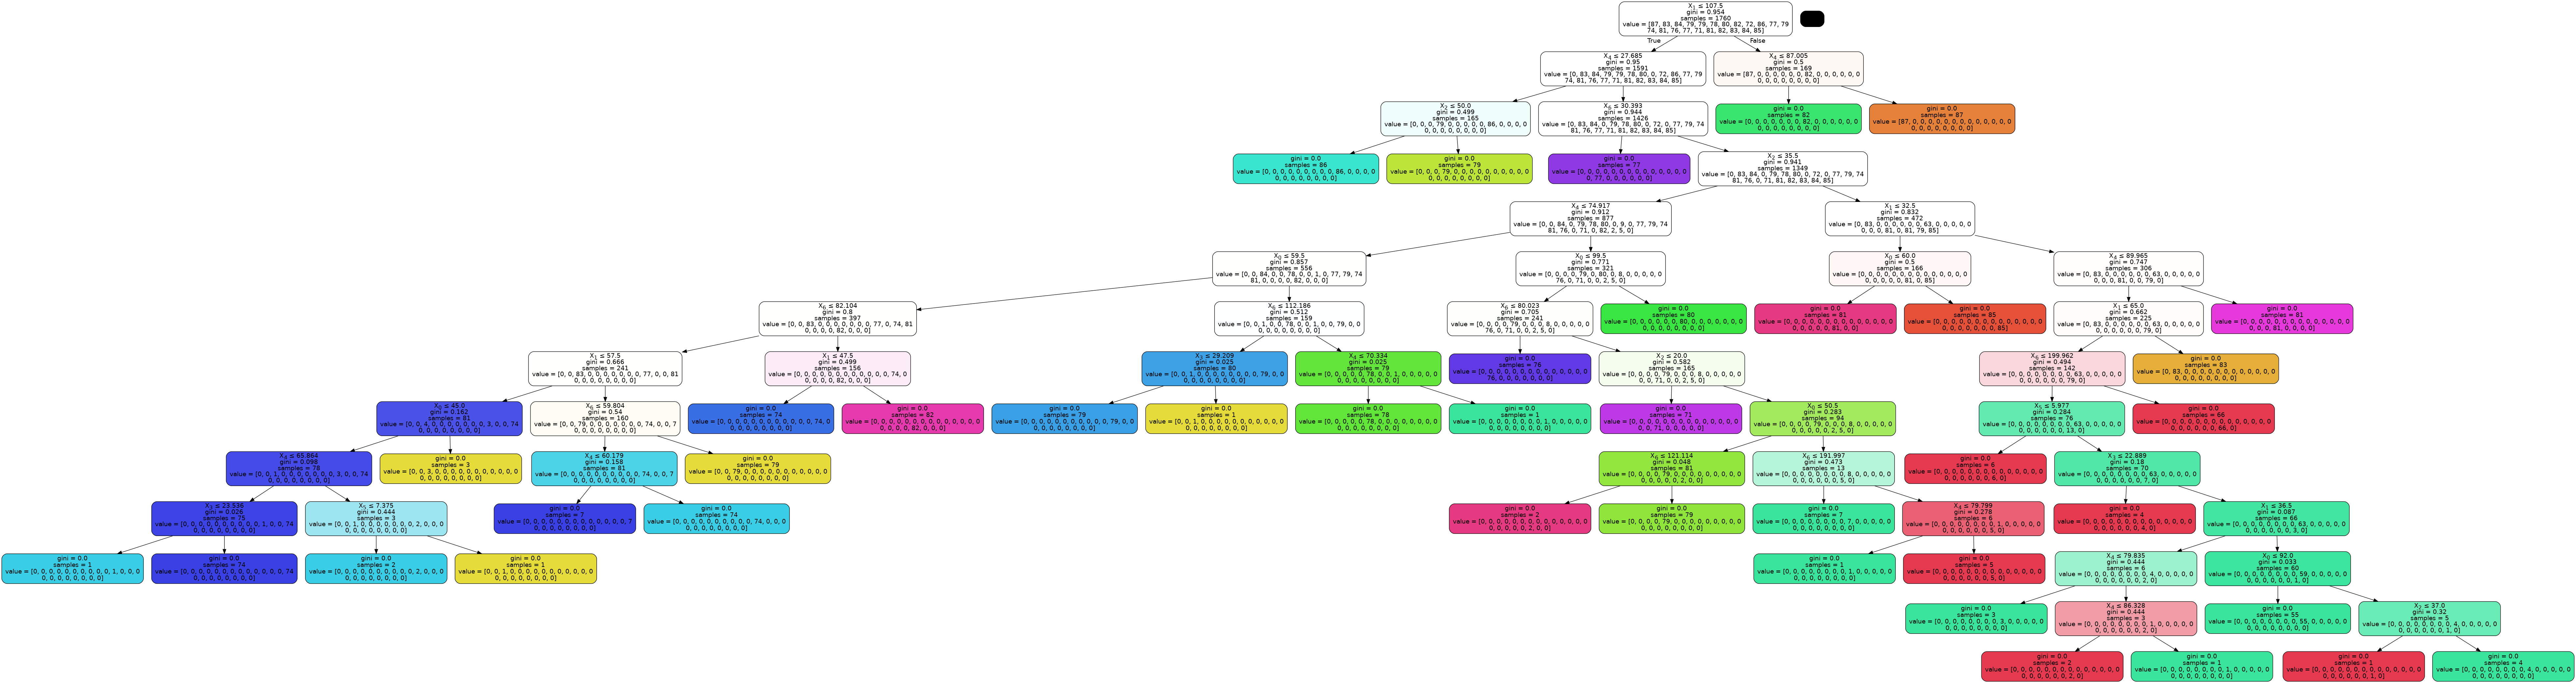

In [150]:
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,filled=True, rounded=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Cross validation 

In [151]:
score = cross_val_score(DT, features, target,cv=10)
print("Cross-validation scores: {}".format(score))
print("Average cross-validation score: {:.2f}".format(score.mean()))

Cross-validation scores: [0.99090909 0.98636364 0.99545455 0.99090909 0.98636364 0.99090909
 0.99545455 0.99545455 0.98181818 0.99545455]
Average cross-validation score: 0.99


### Accuracy

In [152]:
#Print Train Accuracy
dt_train_accuracy = DT.score(x_train,y_train)
print("Training accuracy = ",DT.score(x_train,y_train))
#Print Test Accuracy
dt_test_accuracy = DT.score(x_test,y_test)
print("Testing accuracy = ",DT.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9840909090909091


### Confusion matrix

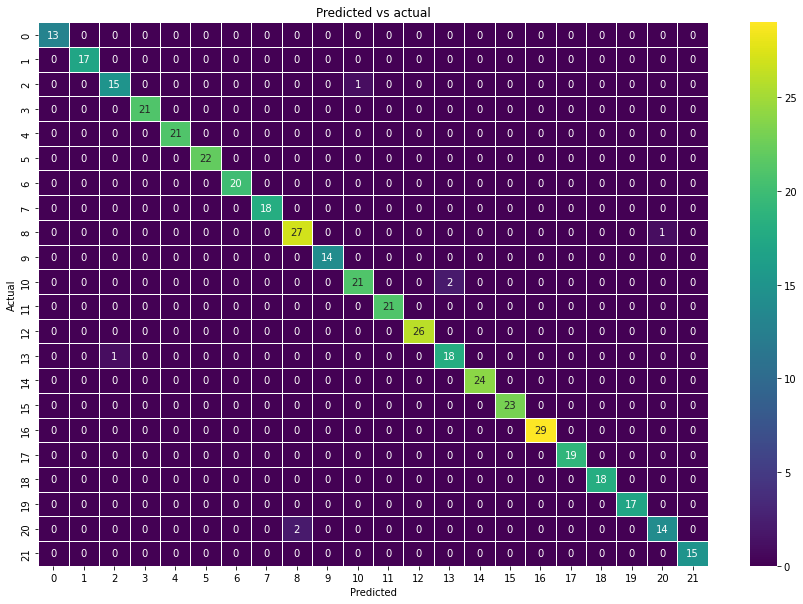

In [139]:
y_pred = DT.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

# USING RANDOM FOREST CLASSIFICATION ALGORITHM

In [180]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=13, random_state=15)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.93      1.00      0.97        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00 

### Visualising Random forest

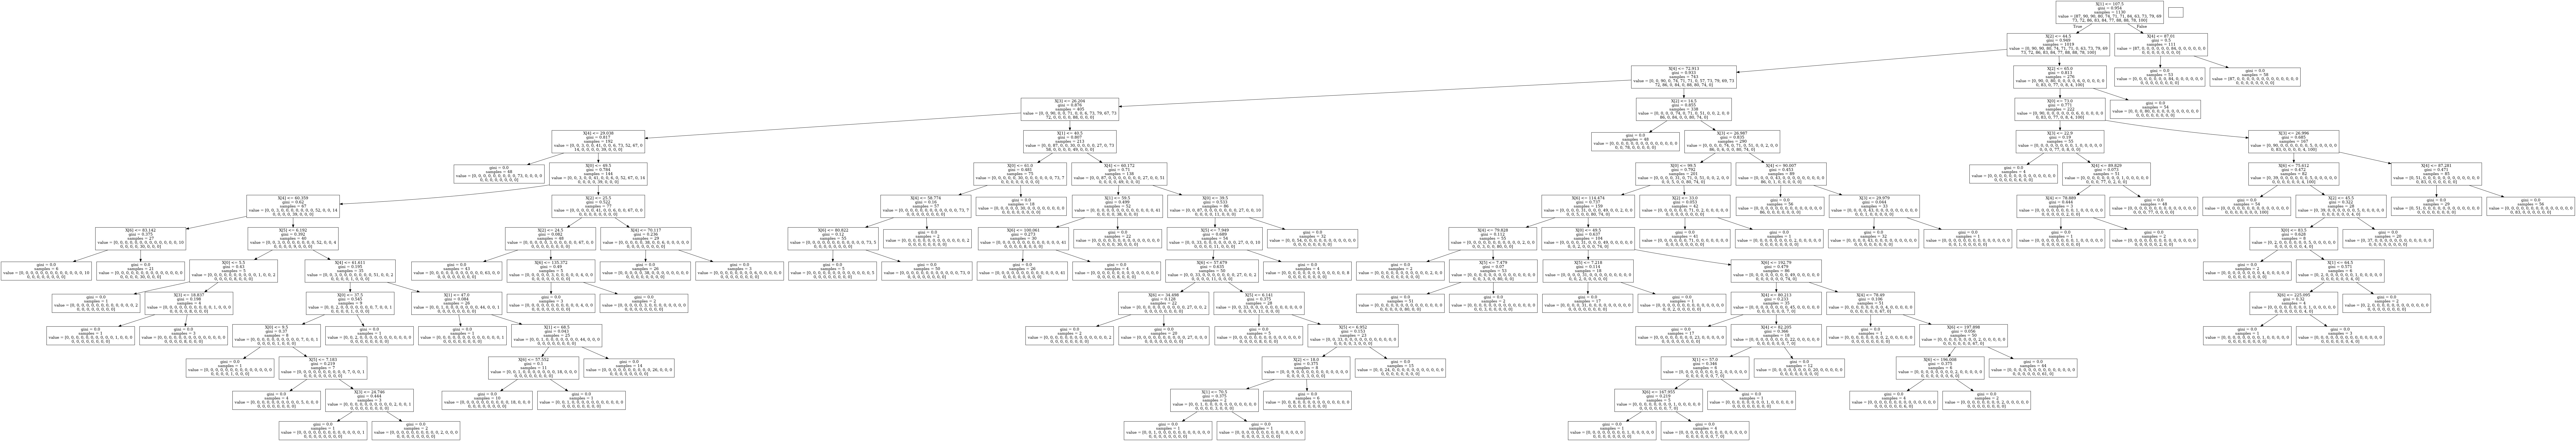

In [181]:
dotfile = StringIO()
i_tree = 0
for tree_in_forest in RF.estimators_:
    if (i_tree <1):        
        export_graphviz(tree_in_forest, out_file=dotfile)
        pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
        i_tree += 1
Image(filename="dtree0.png")

### Cross validation

In [182]:
score = cross_val_score(RF,features,target,cv=10)
print("Cross-validation scores: {}".format(score))
print("Average cross-validation score: {:.2f}".format(score.mean()))

Cross-validation scores: [1.         0.99090909 1.         0.99090909 0.99545455 0.99090909
 0.99545455 0.99545455 0.97272727 1.        ]
Average cross-validation score: 0.99


### Accuracy 

In [167]:
#Print Train Accuracy
rf_train_accuracy = RF.score(x_train,y_train)
print("Training accuracy = ",RF.score(x_train,y_train))
#Print Test Accuracy
rf_test_accuracy = RF.score(x_test,y_test)
print("Testing accuracy = ",RF.score(x_test,y_test))

Training accuracy =  1.0
Testing accuracy =  0.9954545454545455


### Confusion Matrix

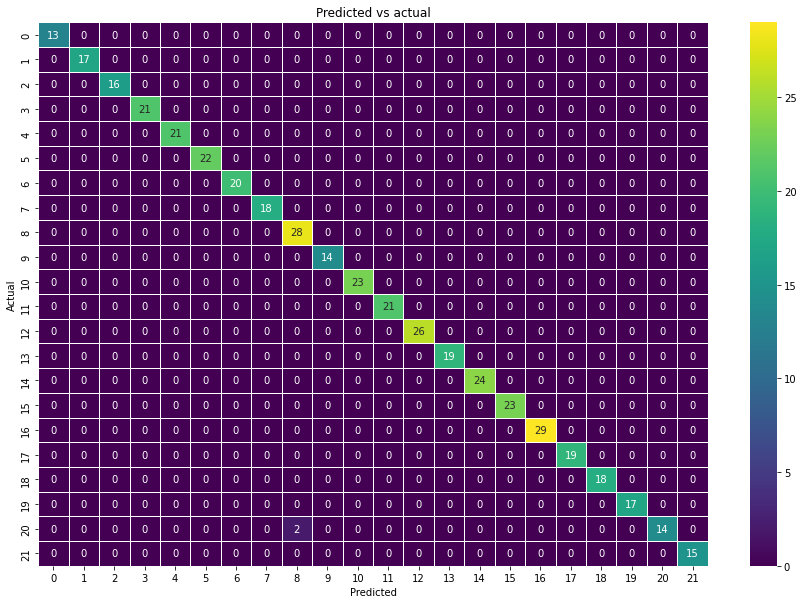

In [183]:
y_pred = RF.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()

### Custom Random forest

# USING NAIVEBAYES CLASSIFICATION ALGORITHM

In [184]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00    

### Cross validation

In [185]:
score = cross_val_score(NaiveBayes,features,target,cv=10)
print("Cross-validation scores: {}".format(score))
print("Average cross-validation score: {:.2f}".format(score.mean()))

Cross-validation scores: [1.         0.99545455 1.         0.99090909 0.99090909 1.
 0.99090909 1.         0.98636364 0.99545455]
Average cross-validation score: 1.00


### Accuracy

In [186]:
#Print Train Accuracy
nb_train_accuracy = NaiveBayes.score(x_train,y_train)
print("Training accuracy = ",NaiveBayes.score(x_train,y_train))
#Print Test Accuracy
nb_test_accuracy = NaiveBayes.score(x_test,y_test)
print("Testing accuracy = ",NaiveBayes.score(x_test,y_test))

Training accuracy =  0.9960227272727272
Testing accuracy =  0.990909090909091


### Confusion matrix of Naive Bayes

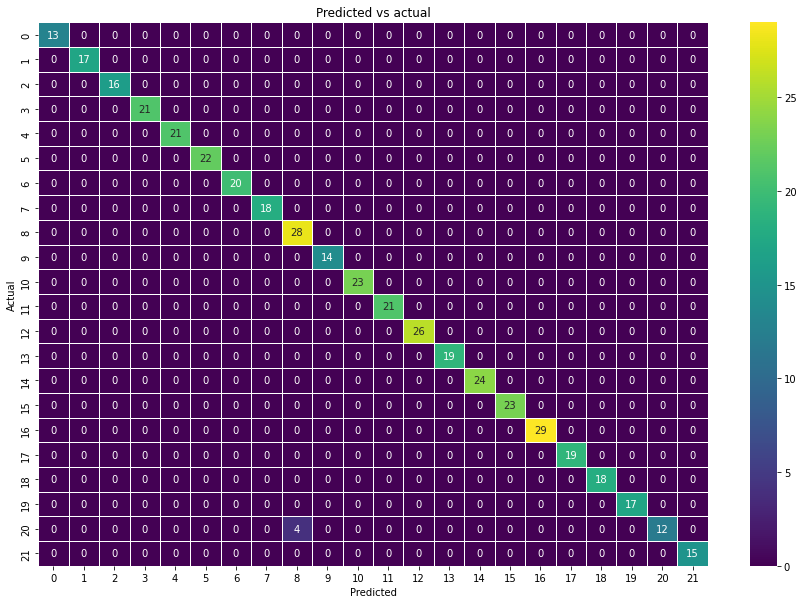

In [187]:
y_pred = NaiveBayes.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_true,y_pred)
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_nb, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual')
plt.show()